In [1]:
!pip install nltk

In [2]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Corrected typo here


[nltk_data] Downloading package stopwords to C:\Users\salma
[nltk_data]     elbadry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\salma
[nltk_data]     elbadry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\salma elbadry\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
#importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC

#importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\PROJECT_NLP\spam.csv")

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
print('shape of dataset', df.shape)


shape of dataset (5572, 2)


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
print("count of label:\n",df['Category'].value_counts())

count of label:
 ham     4825
spam     747
Name: Category, dtype: int64


In [11]:
# Checking the Ratio of labels
print("Not a Spam Email Ratio i.e. 0 label:", round(len(df[df['Category'] == 'ham']) / len(df['Category']), 2) * 100, "%")
print("Spam Email Ratio that is 1 label:", round(len(df[df['Category'] == 'spam']) / len(df['Category']), 2) * 100, "%")


Not a Spam Email Ratio i.e. 0 label: 87.0 %
Spam Email Ratio that is 1 label: 13.0 %


In [12]:
df['lenght']=df.Message.str.len()
df.head()

,Category,Message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df['Message']=df['Message'].str.lower()
df.head()

,Category,Message,lenght
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [14]:
# Replace email addresses with 'email'
df['Message'] = df['Message'].str.replace(r'^.+@[^\. ] .* \.[a-z]{2, ]$', 'emailaddress')
# Replace URLs with 'webaddress'
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\. ]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
# Replace currency symbols with 'moneysymb' (E can by typed with ALT key + 156)
df['Message'] = df['Message' ].str.replace(r'E|\$', 'dollers')
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber
df['Message'] = df['Message'].str.replace(r'\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{4}$', 'phonenumber')
#replace numeric chars with 'numbr'
df['Message'] = df['Message' ].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuations
df['Message'] = df['Message' ]. str.replace(r'[^\w\d\s]', ' ')
#replce whitespace btw terms with single space
df['Message'] = df['Message']. str. replace(r'\s+', ' ')
#remove leading and trailing whitesspace
df['Message'] = df['Message' ]. str.replace(r'^\s+|\s+?$', '')

In [16]:
df.head()

,Category,Message,lenght
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in numbr a wkly comp to win fa cup ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i don t think he goes to usf he lives arou...,61


In [17]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', '0', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Message'] = df['Message' ]. apply(lambda x: " ". join(term for term in x.split() if term not in stop_words))

In [18]:
#new column (clean_length) after punctuations, stopwords removal
df['clean_length'] = df.Message.str.len()
df.head()

,Category,Message,lenght,clean_length
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif oni,29,21
2,spam,free entry numbr wkly comp win fa cup final tk...,155,139
3,ham,dun say early hor c already say,49,31
4,ham,nah think goes usf lives around though,61,38


In [19]:
#total length removal
print("Original Length:",df.lenght.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.lenght.sum()) - (df.clean_length.sum()))

Original Length: 447816
Cleaned Length: 300126
Total Words Removed: 147690


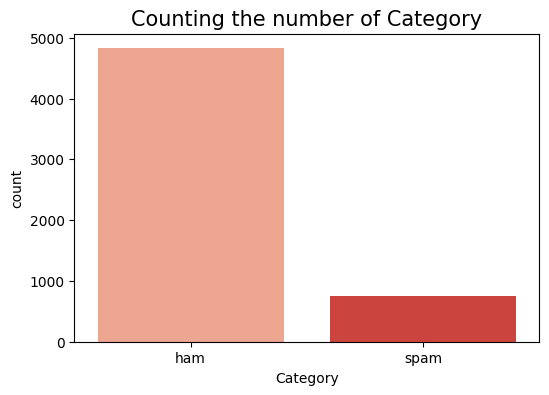

In [20]:
df['Category'] = pd.Categorical(df['Category'])
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df, palette='Reds')
plt.title('Counting the number of Category', fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()


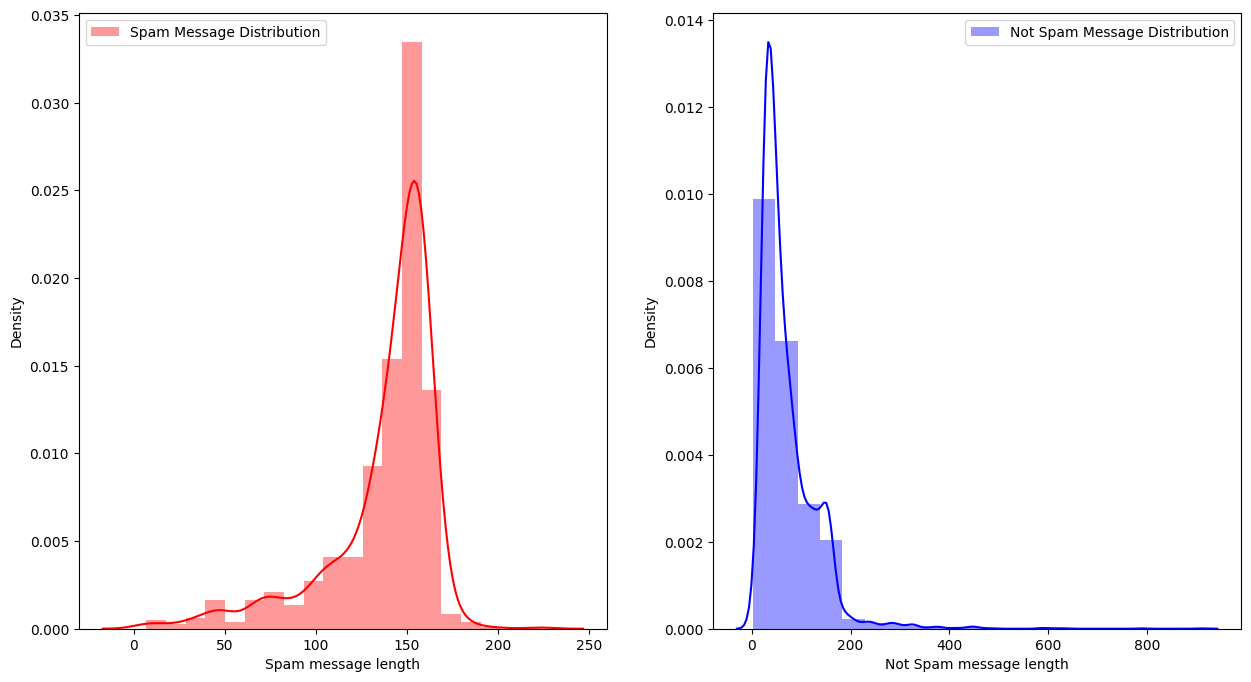

In [21]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.distplot(df[df['Category'] == 'spam']['lenght'], bins=20, ax=ax[0], label='Spam Message Distribution', color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['Category'] == 'ham']['lenght'], bins=20, ax=ax[1], label='Not Spam Message Distribution', color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()


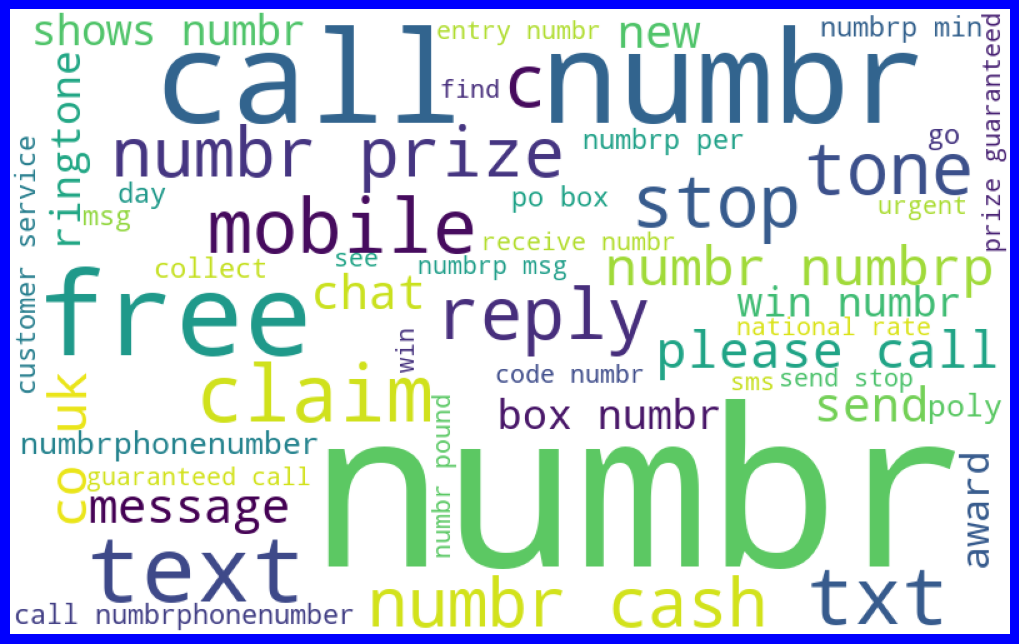

In [22]:
#Getting sense of loud words in spam
from wordcloud import WordCloud

spams = df['Message'][df['Category'] == 'spam']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8), facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt. show()

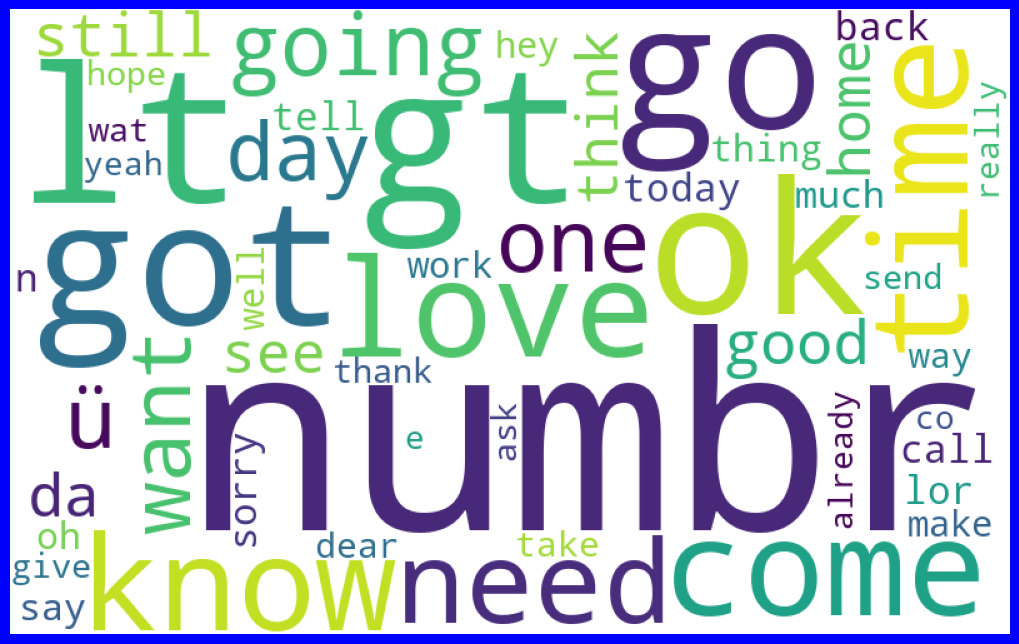

In [23]:
from wordcloud import WordCloud

not_spams = df['Message'][df['Category'] == 'ham']

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt. show()

In [24]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

tf_vec = TfidfVectorizer()

#naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

features = tf_vec.fit_transform(df['Message'])

X = features
y = df['Category']

In [25]:
X_train,x_test, Y_train,y_test = train_test_split(X,y,random_state=42)

SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9842067480258435


In [26]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.98      0.90      0.94       186

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



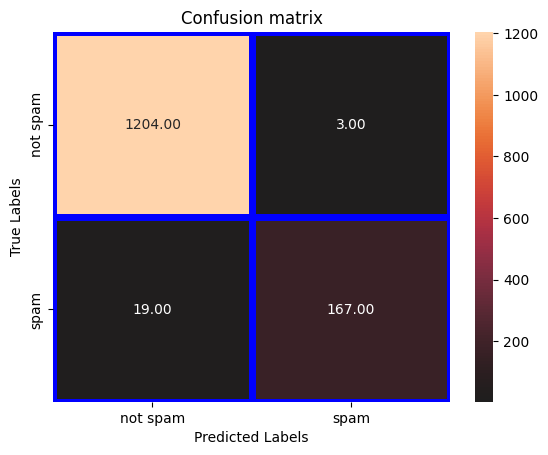

In [31]:
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5, linecolor='b',center=0,fmt=".2f")

ax.set_xlabel('Predicted Labels'); ax. set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam', 'spam'])
ax.yaxis. set_ticklabels(['not spam', 'spam'])
plt.show()

In [33]:
import pickle
filename='Email_spam_detect.pkl'
M=open(filename, 'wb')
pickle. dump(SVM,M)
M.close()